#### Import & Data Load

In [22]:
import sys
import os
import pandas as pd
import numpy as np

sys.path.append(os.path.abspath("../src"))

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy, DatasetShapeInspectionStrategy, UniqueTypeInspectionStrategy
from analyze_src.missing_values_analysis import MissingValuesAnalyser, MissingValuesHeatMapStrategy
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis, CategoricalVsCategoricalAnalysis, CategoricalVsCategoricalBarAnalysis
from analyze_src.multivariate_analysis import MultivariateAnalyser, CorrelationHeatmapAnalysis, PairPlotAnalysis
from data_fetcher import DataFetcher, UCIFetchStrategy

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [23]:
# Fetching and saving data
#fetcher = DataFetcher(UCIFetchStrategy(dataset_id=468))
#df = fetcher.fetch_and_save()
#df.head()

#if data already loaded:
data_path = 'c:/Users/Lenovo/Desktop/online-shopping-analysis/data/data.csv'
df = pd.read_csv(data_path)
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

#### Data Inspection

In [4]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTy

In [5]:
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25

In [6]:
data_inspector.set_strategy(DatasetShapeInspectionStrategy())
data_inspector.execute_inspection(df)


Dataset Shape: 
(12330, 18)


In [7]:
data_inspector.set_strategy(UniqueTypeInspectionStrategy())
data_inspector.execute_inspection(df)


Unique Types per Column: 
Administrative: 27 unique values
Administrative_Duration: 3335 unique values
Informational: 17 unique values
Informational_Duration: 1258 unique values
ProductRelated: 311 unique values
ProductRelated_Duration: 9551 unique values
BounceRates: 1872 unique values
ExitRates: 4777 unique values
PageValues: 2704 unique values
SpecialDay: 6 unique values
Month: 10 unique values
OperatingSystems: 8 unique values
Browser: 13 unique values
Region: 9 unique values
TrafficType: 20 unique values
VisitorType: 3 unique values
Weekend: 2 unique values
Revenue: 2 unique values


#### Dataset Summary

**Provided information about the dataset** \
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.
The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

**General Information** \
The dataset consists of 18 features + target. 
- Continuous Variables: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay
- Categorial Variables: Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend
- Target: Revenue (Boolean)

#### Missing Values


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


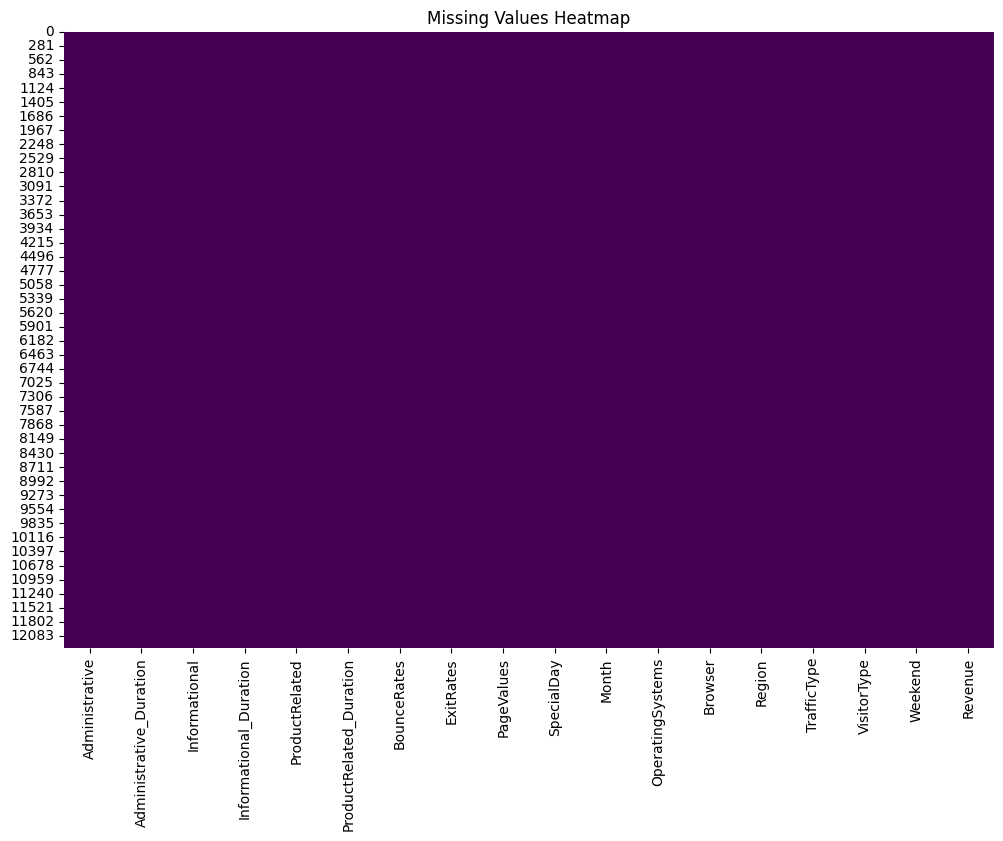

In [10]:
data_inspector = MissingValuesAnalyser(MissingValuesHeatMapStrategy())
data_inspector.execute_inspection(df)

#### Univariate Analysis

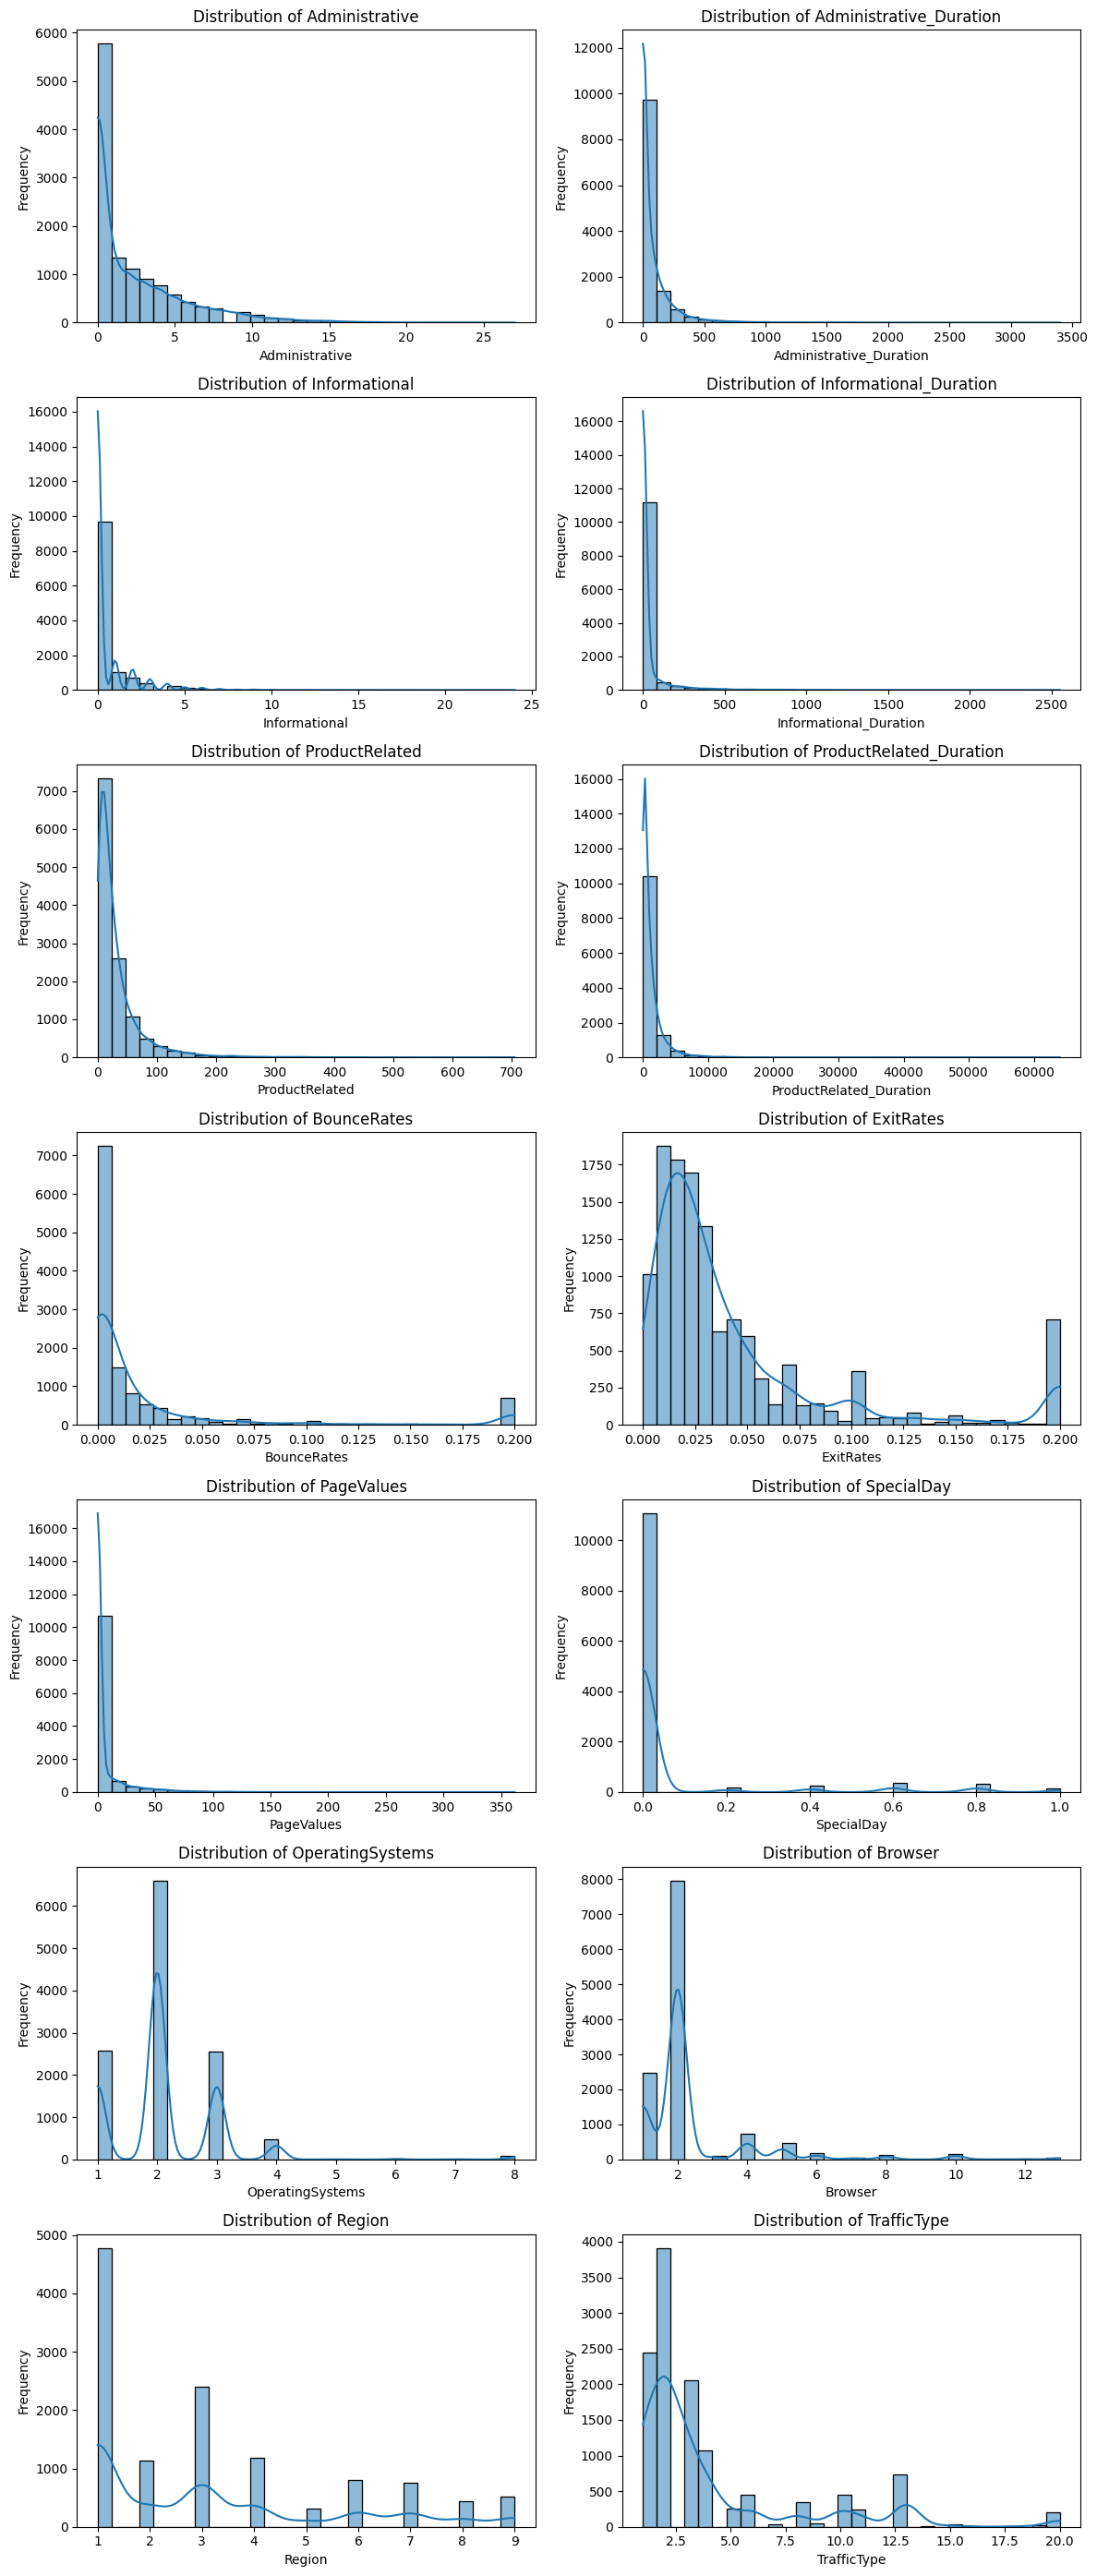

In [11]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, feature = None)

2025-09-05 11:04:05,359 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
c:\Users\Lenovo\Desktop\online-shopping-analysis\analysis\analyze_src\univariate_analysis.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=df, palette="muted", ax=axes[i])
2025-09-05 11:04:05,381 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
c:\Users\Lenovo\Desktop\online-shopping-analysis\analysis\analyze_src\univariate_analysis.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

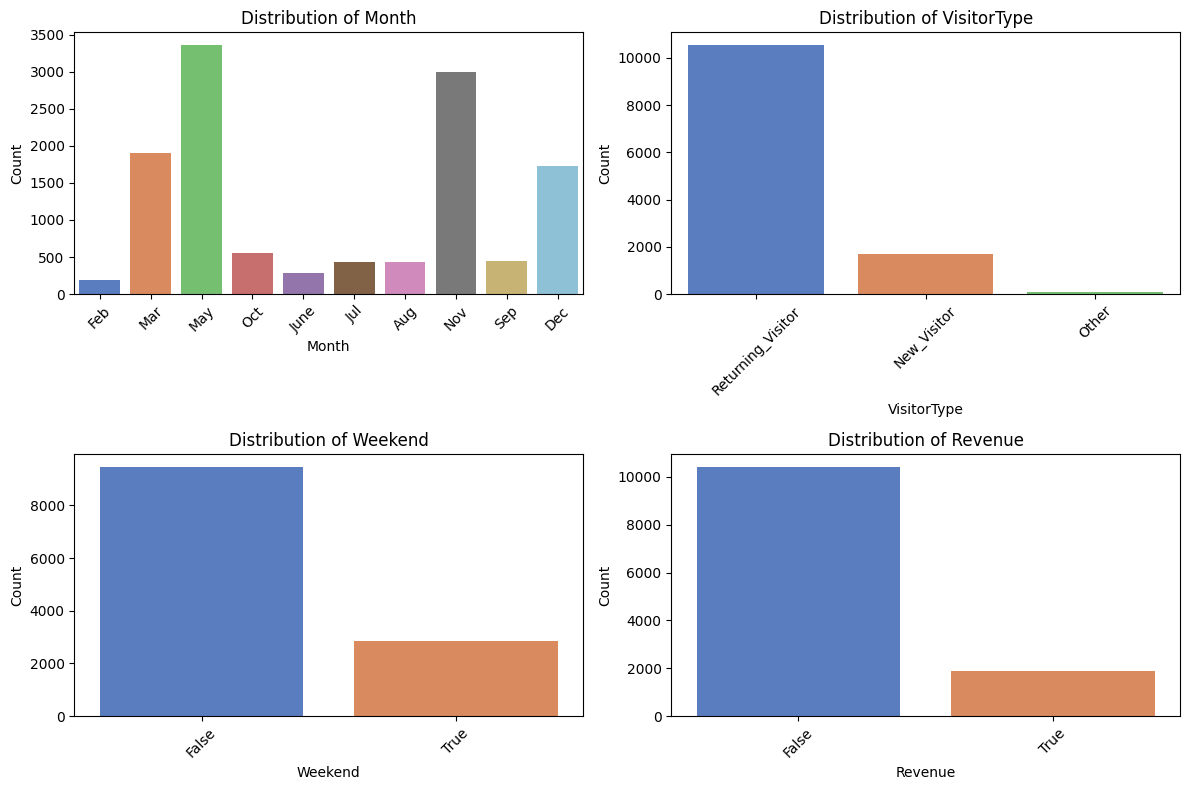

In [12]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, feature = None)

2025-09-05 11:09:35,462 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
c:\Users\Lenovo\Desktop\online-shopping-analysis\analysis\analyze_src\univariate_analysis.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=f, data=df, palette="muted", ax=axes[i])
2025-09-05 11:09:35,482 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-05 11:09:35,711 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before p

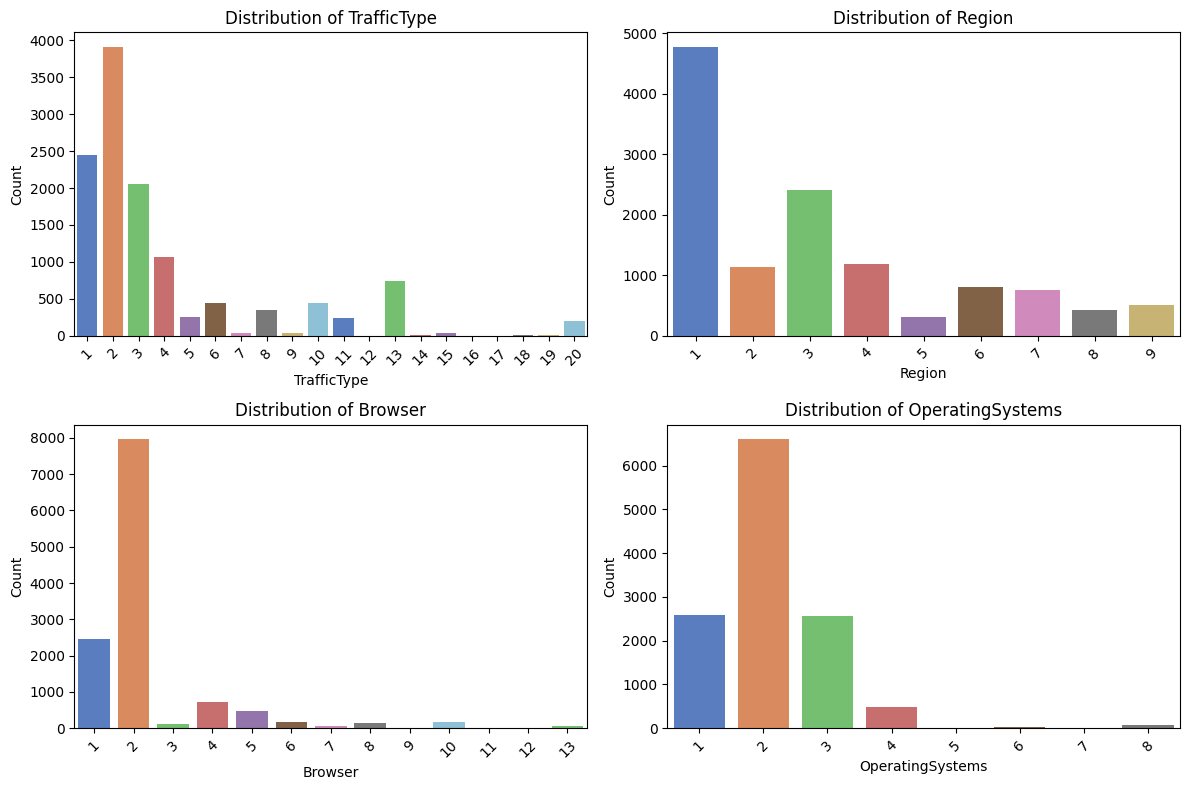

In [13]:
univariate_analyzer.execute_analysis(df, feature = ['TrafficType', 'Region', 'Browser', 'OperatingSystems'])

#### Notes on Feature Engineering

- Boolean has to be transformed to integer: Weekend, Revenue
- One-hot Encoding: VisitorType
- Categorial columns with high cardinality: Month, TrafficType, Region, Browser, OperatingSystems have to be analysed, if inclusion of all makes sense. Otherwise dimensionality could be too big for e.g. linear regression. 
- ExitRates, BounceRates and SpecialDay look slightly skewed to the right, however, quite okay.
- Pages, Page Durations and PageValue are highly skewed to the left - might use log transformation. 

#### Bivariate Analysis

In [3]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

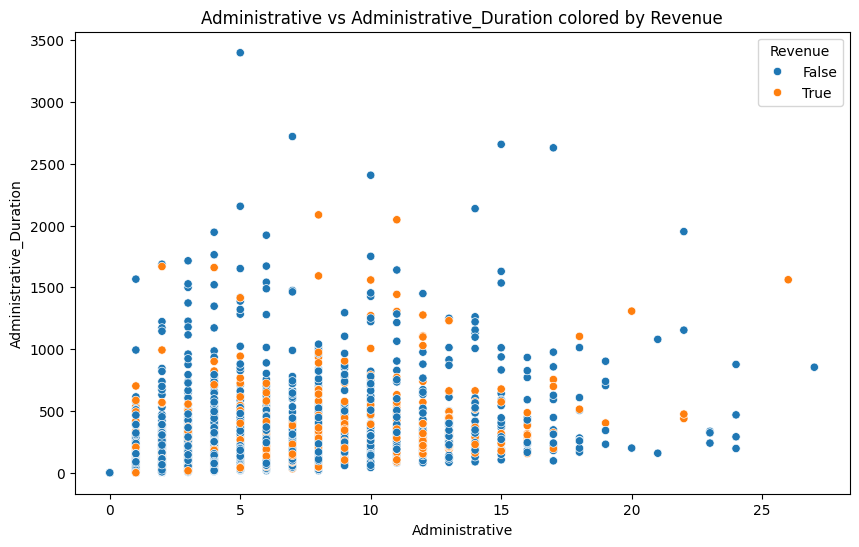

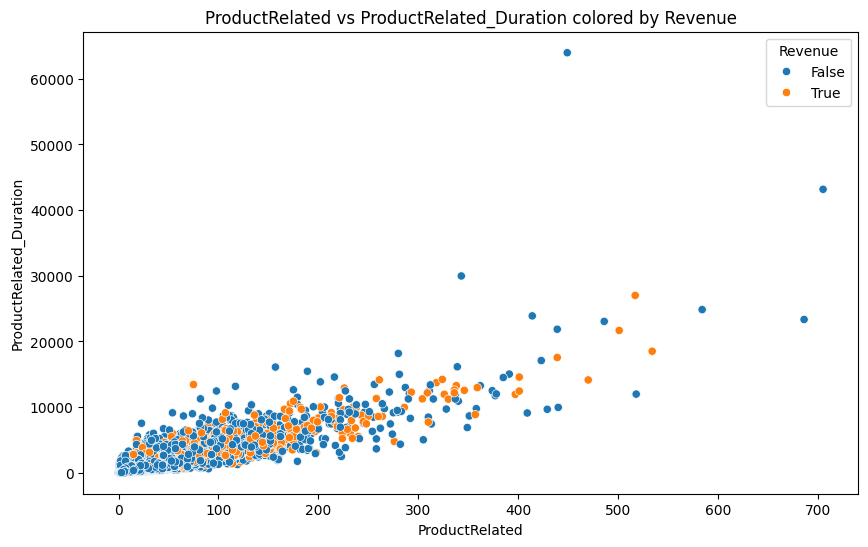

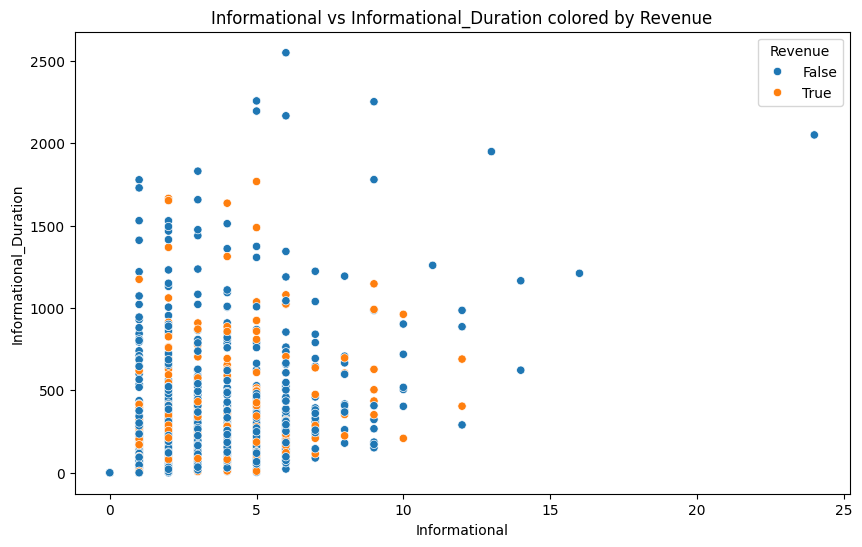

In [12]:
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Administrative', 'Administrative_Duration', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'ProductRelated', 'ProductRelated_Duration', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'Informational', 'Informational_Duration', 'Revenue')

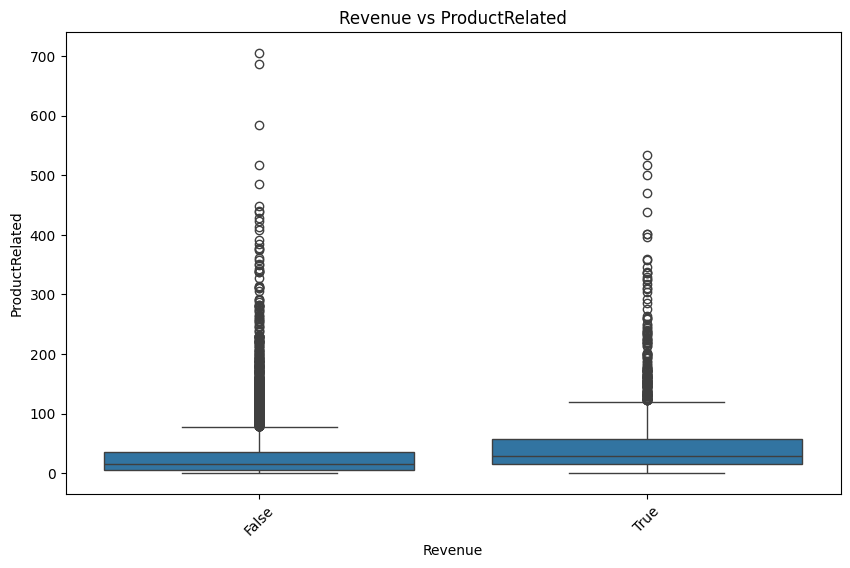

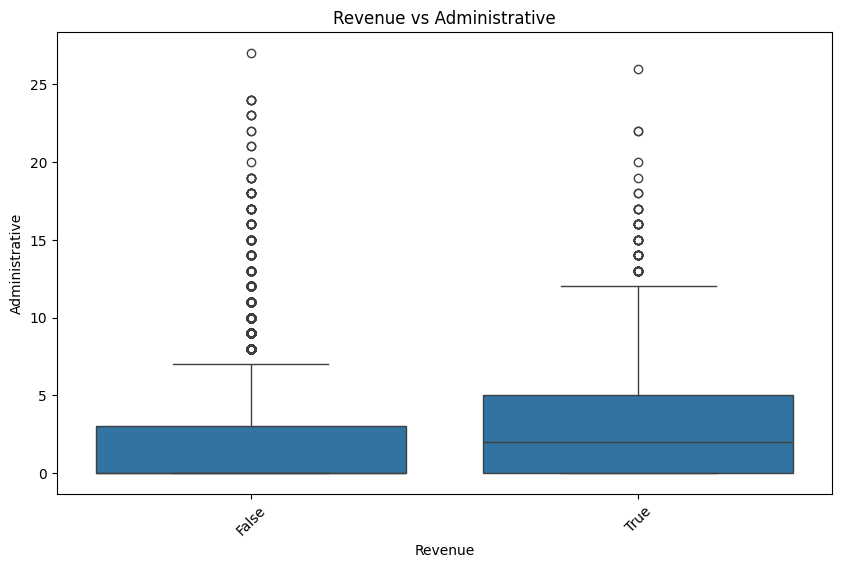

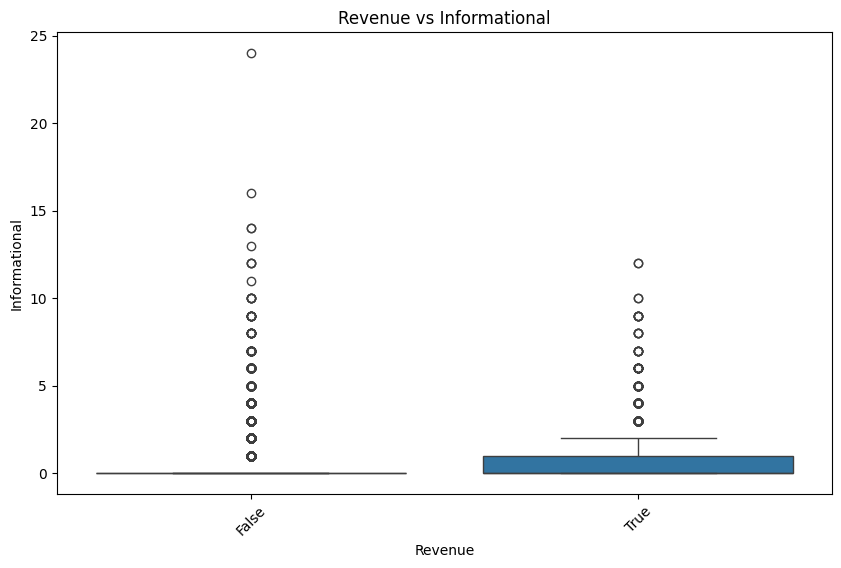

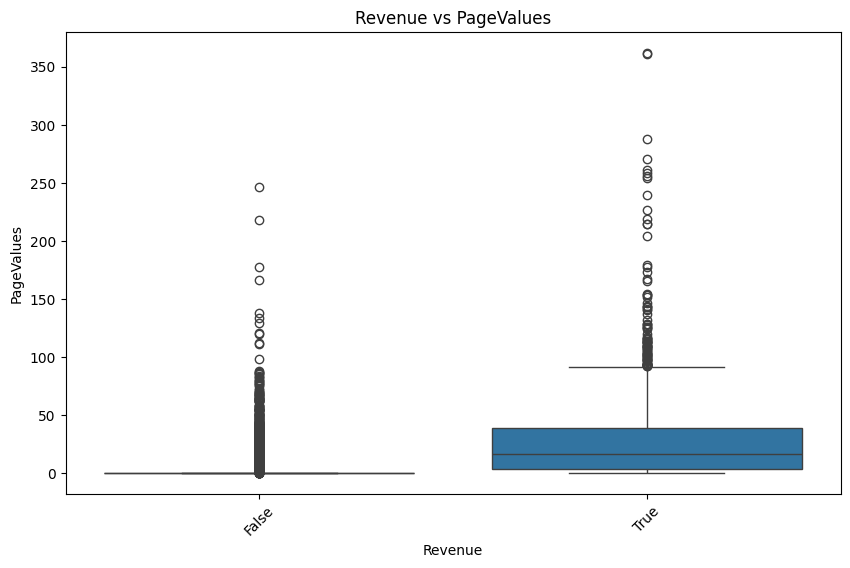

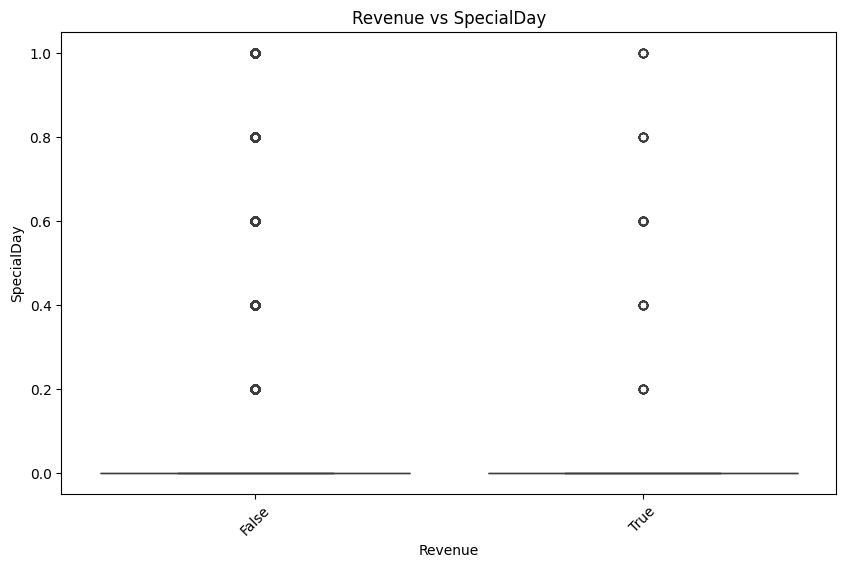

In [13]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Revenue', 'ProductRelated')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'Administrative')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'Informational')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'PageValues')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'SpecialDay')

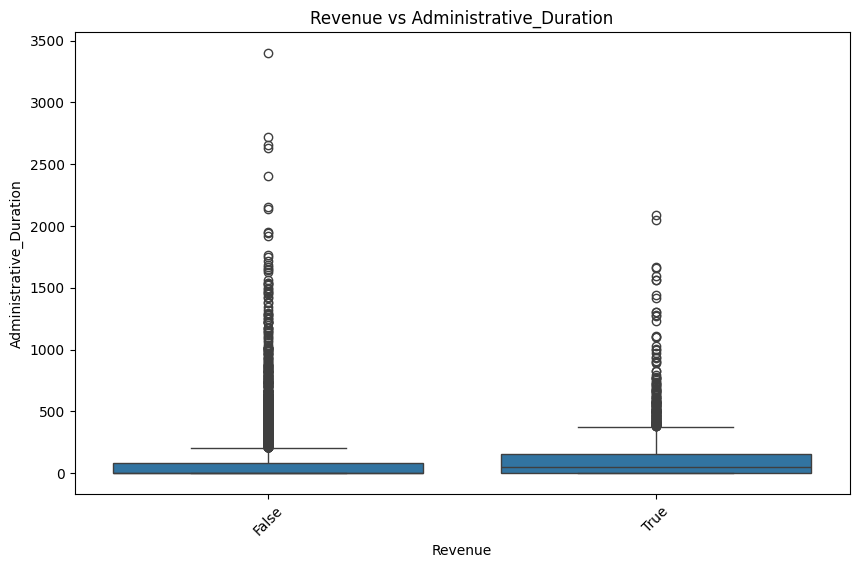

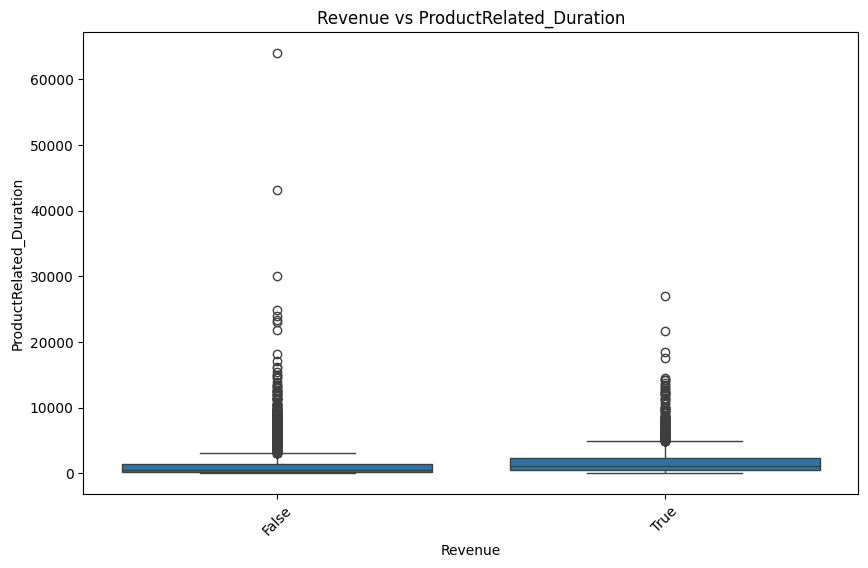

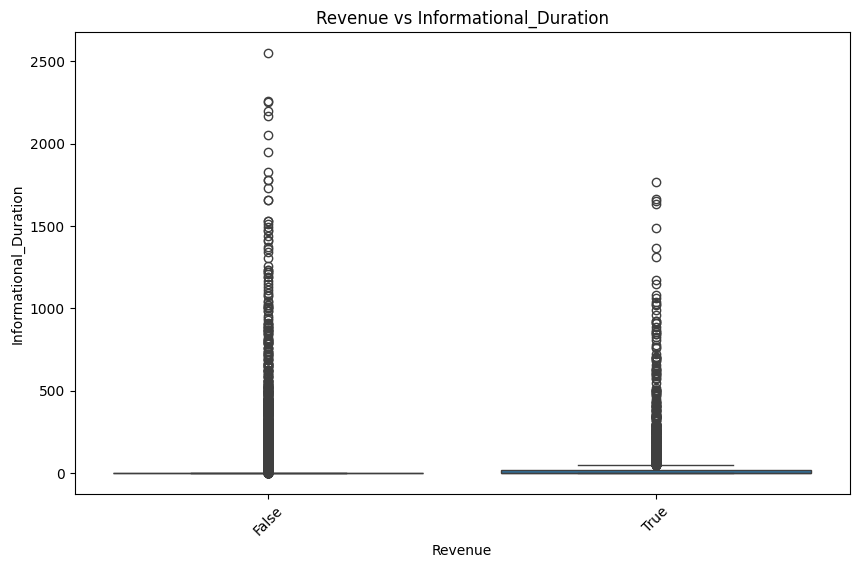

In [14]:
bivariate_analyzer.execute_analysis(df, 'Revenue', 'Administrative_Duration')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'ProductRelated_Duration')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'Informational_Duration')

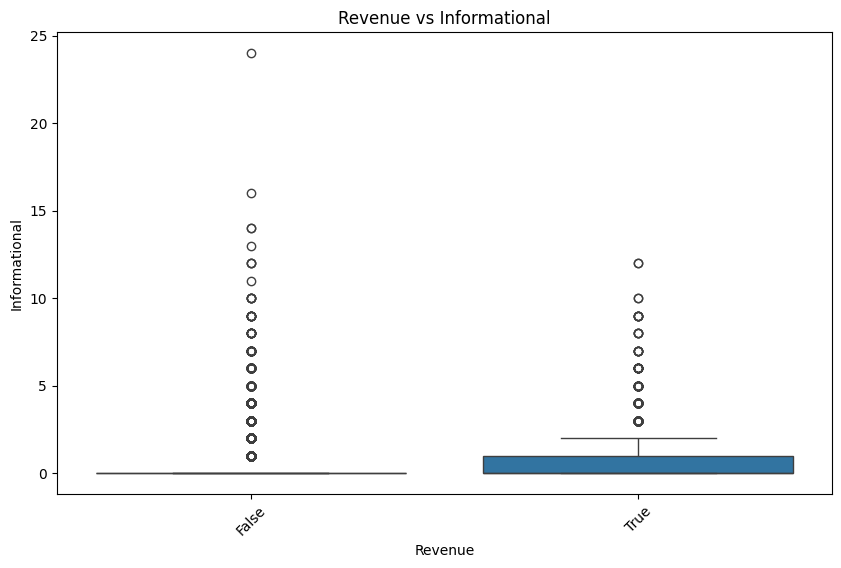

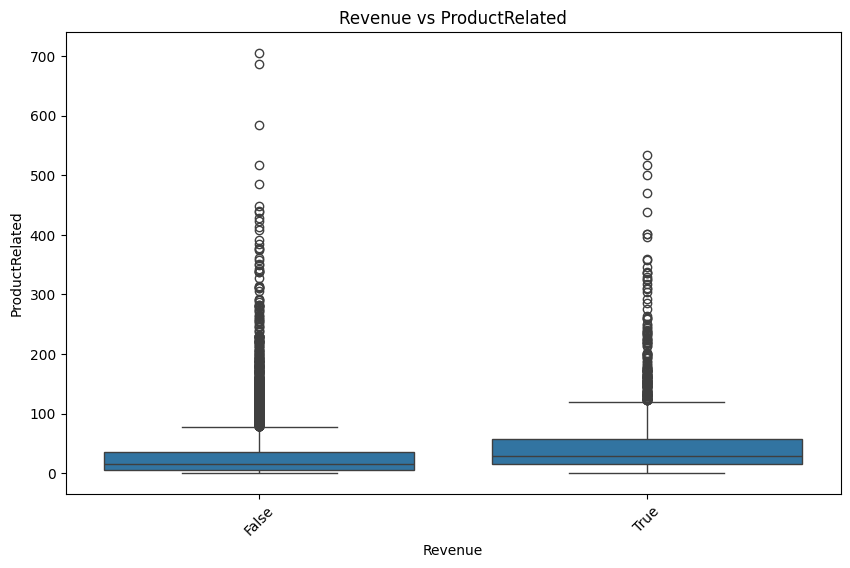

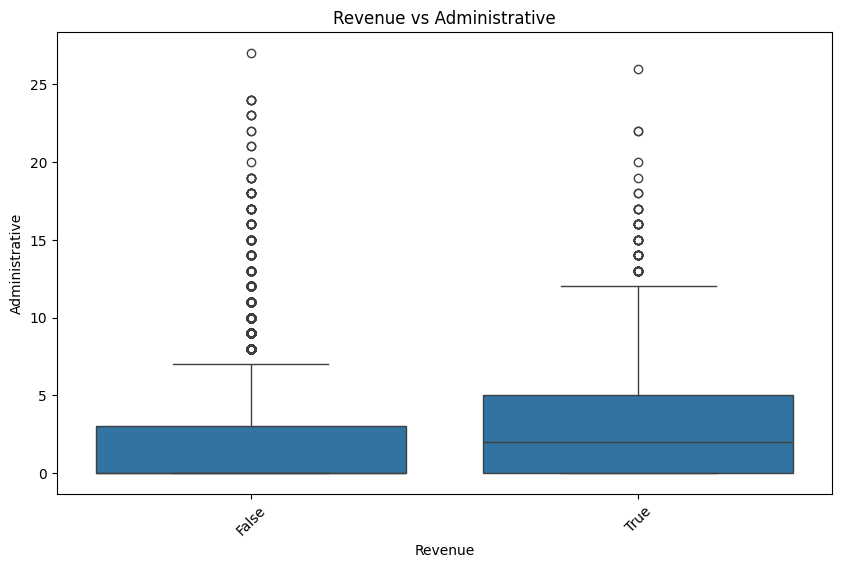

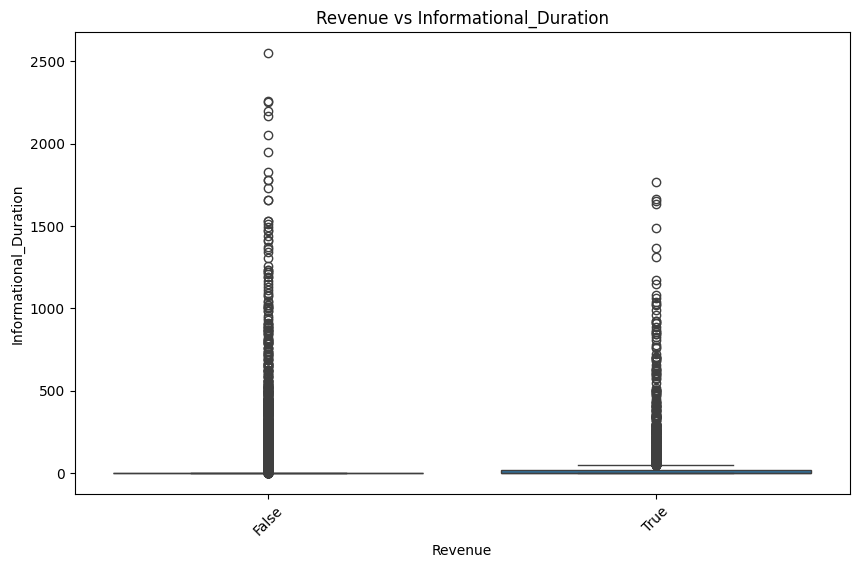

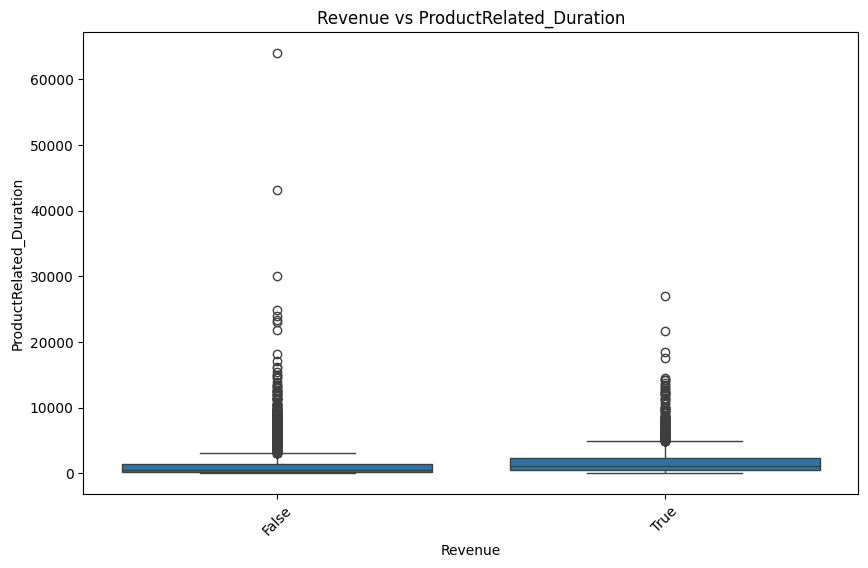

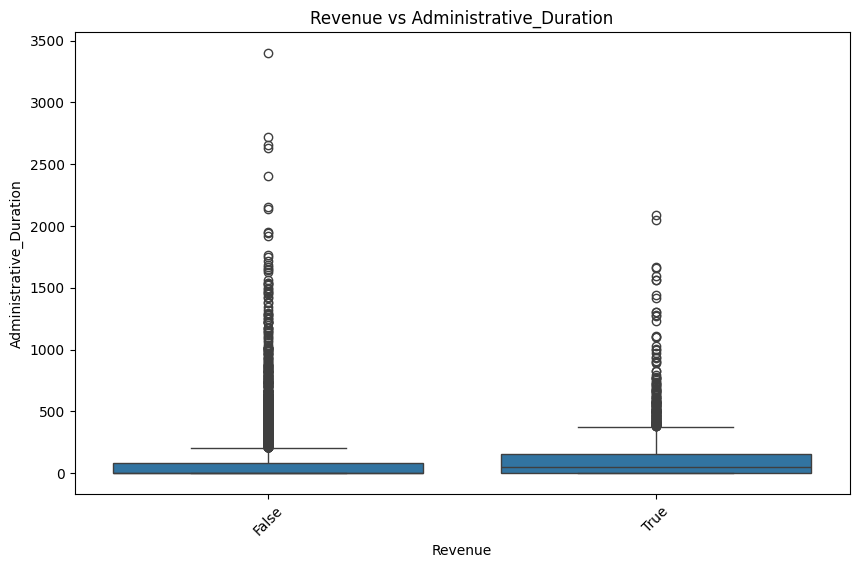

In [24]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Revenue', 'Informational')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'ProductRelated')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'Administrative')

bivariate_analyzer.execute_analysis(df, 'Revenue', 'Informational_Duration')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'ProductRelated_Duration')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'Administrative_Duration')

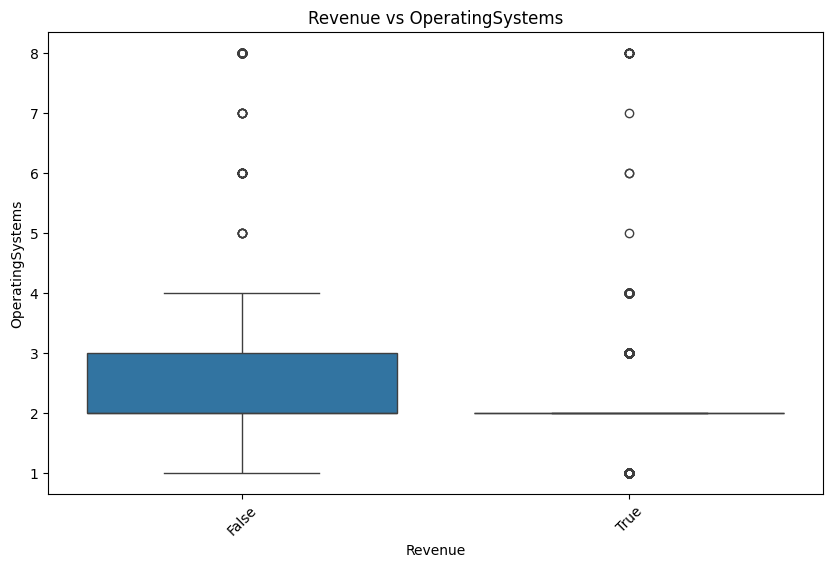

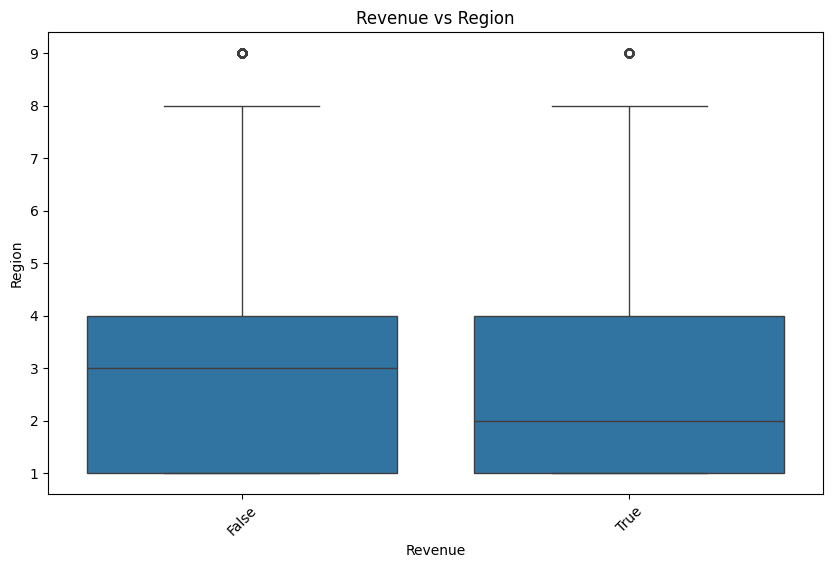

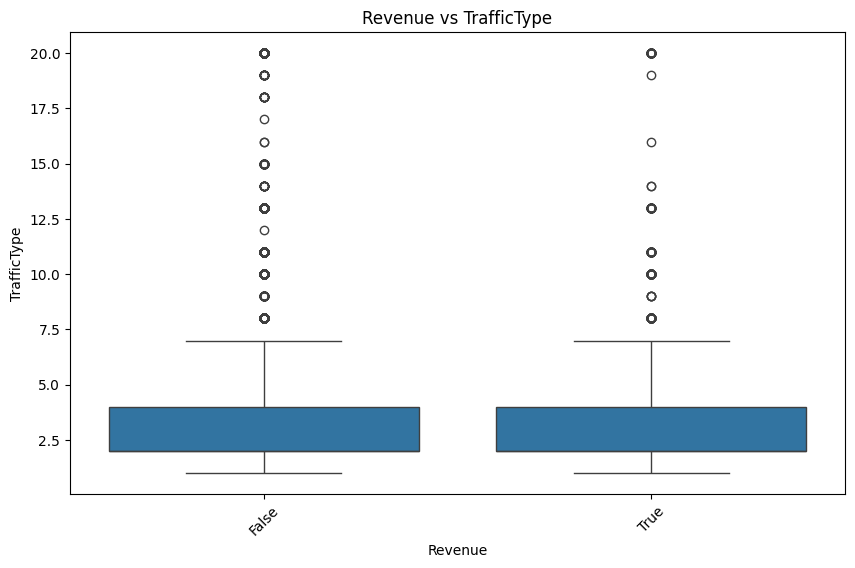

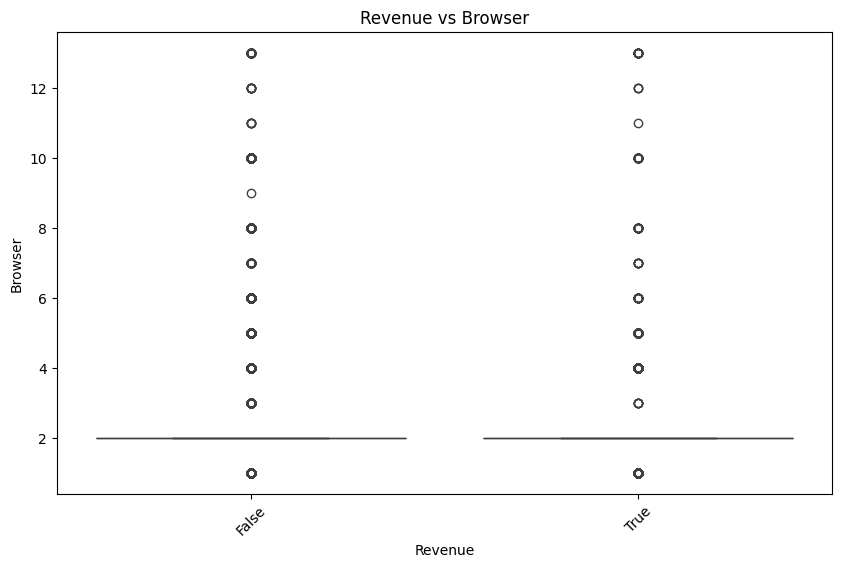

In [25]:
bivariate_analyzer.execute_analysis(df, 'Revenue', 'OperatingSystems')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'Region')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'TrafficType')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'Browser')

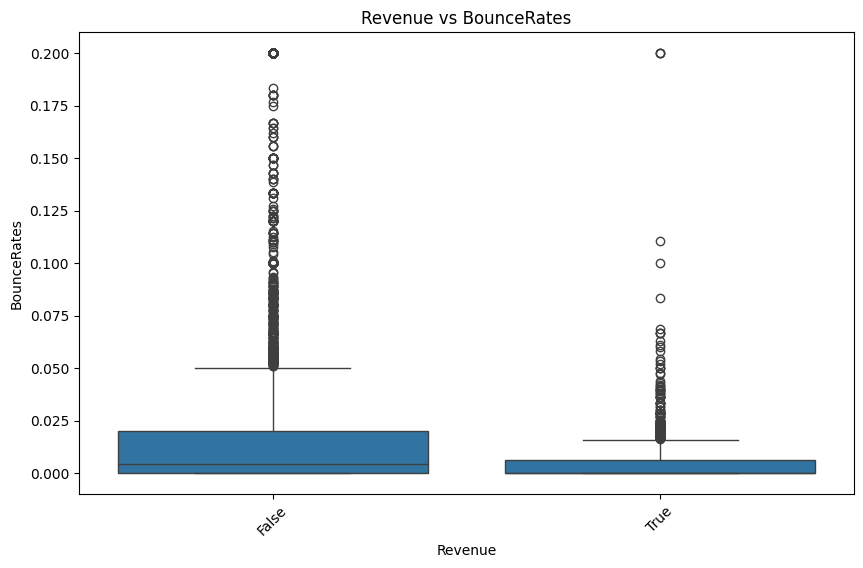

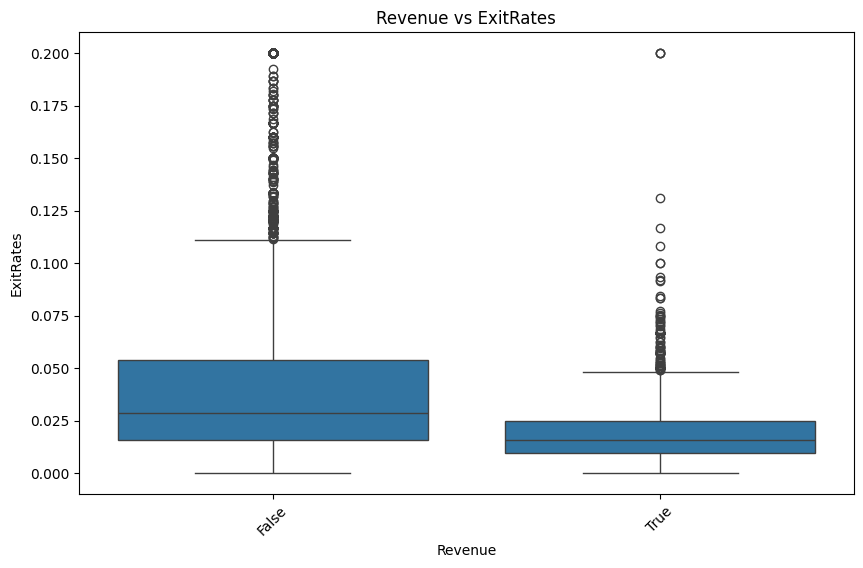

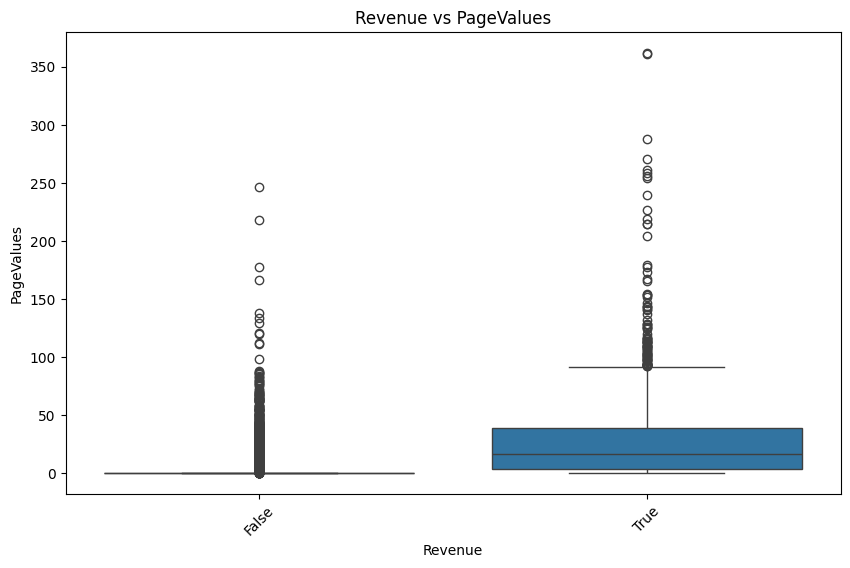

In [11]:
bivariate_analyzer.execute_analysis(df, 'Revenue', 'BounceRates')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'ExitRates')
bivariate_analyzer.execute_analysis(df, 'Revenue', 'PageValues')

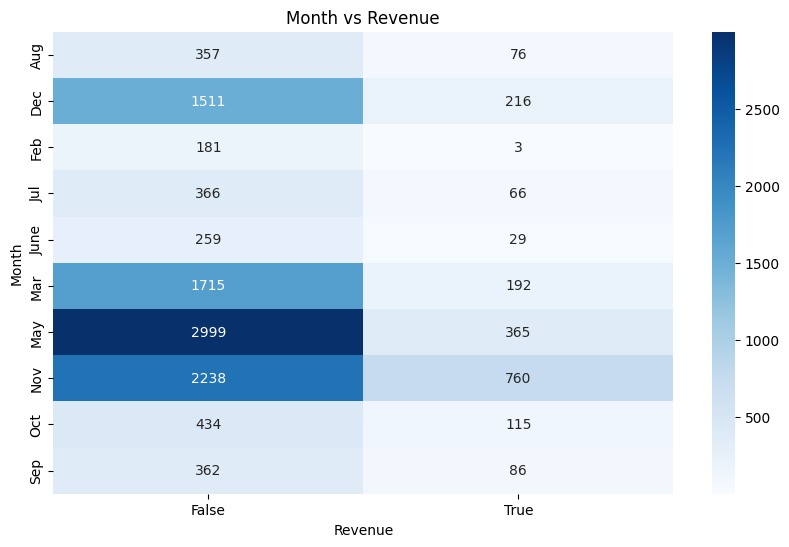

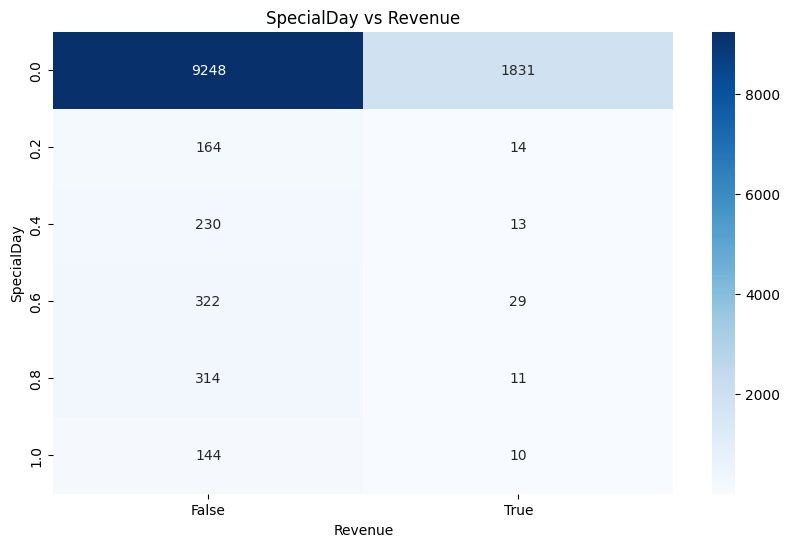

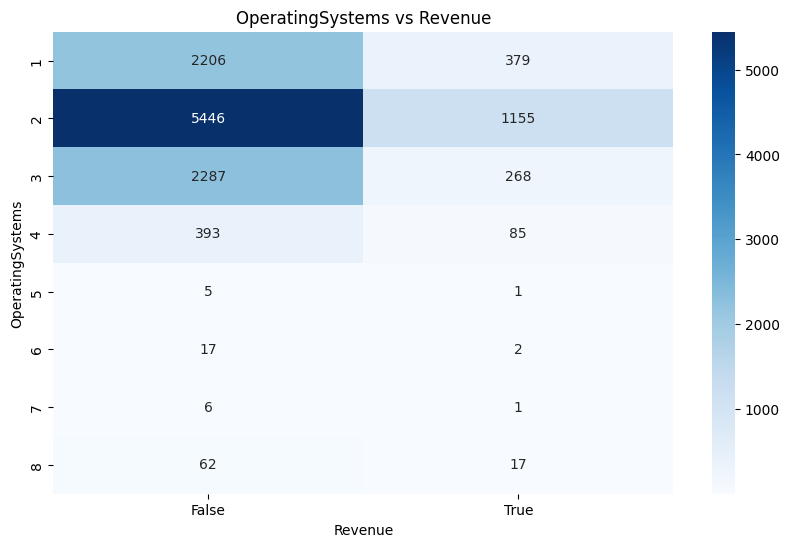

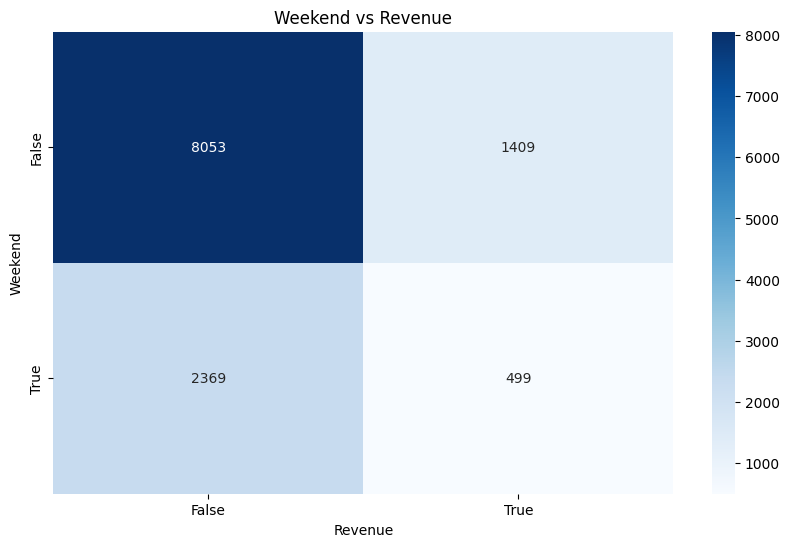

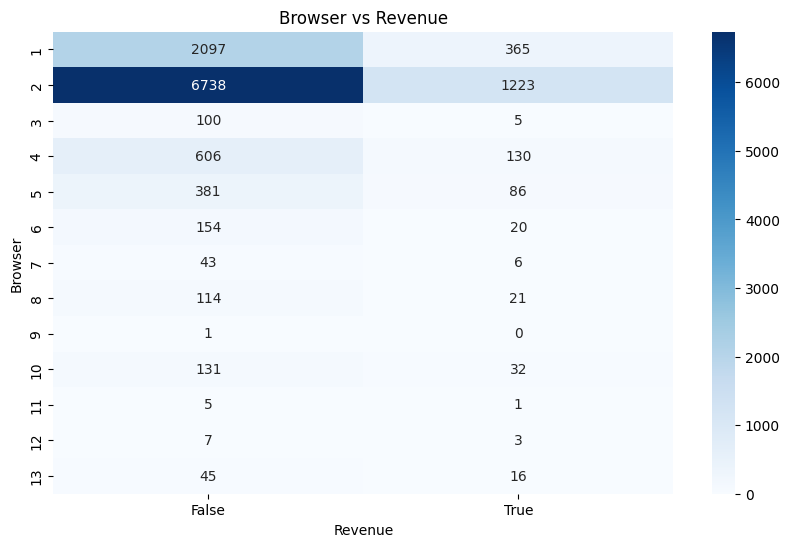

In [26]:
bivariate_analyzer.set_strategy(CategoricalVsCategoricalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Month', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'SpecialDay', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'OperatingSystems', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'Weekend', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'Browser', 'Revenue')

2025-09-05 12:34:26,986 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-05 12:34:27,007 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


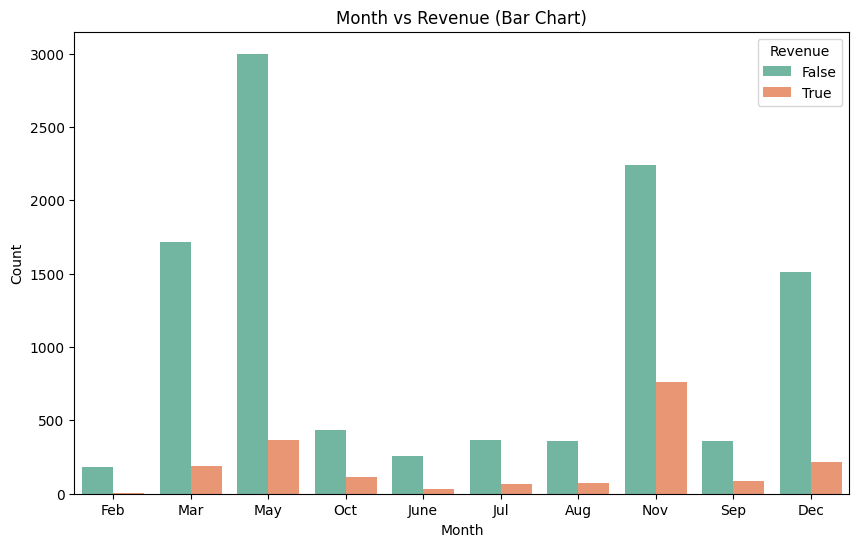

2025-09-05 12:34:27,351 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-05 12:34:27,394 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


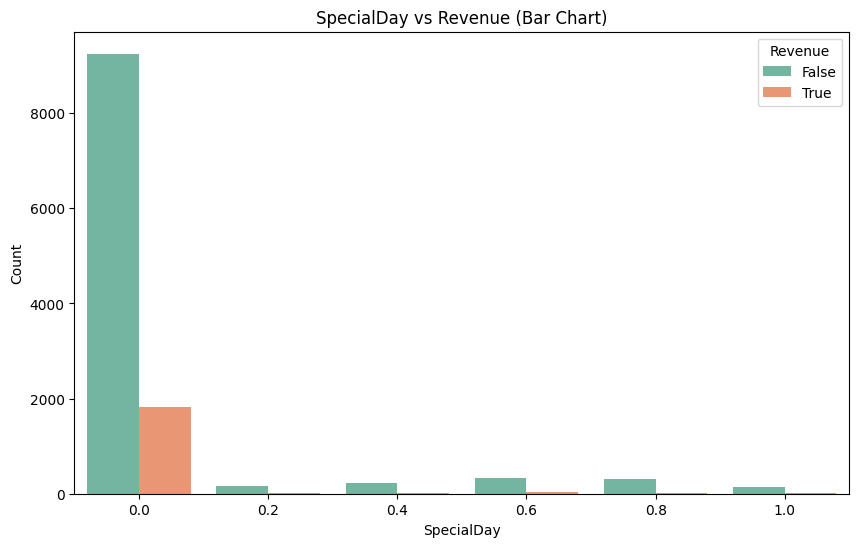

2025-09-05 12:34:27,677 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-05 12:34:27,708 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


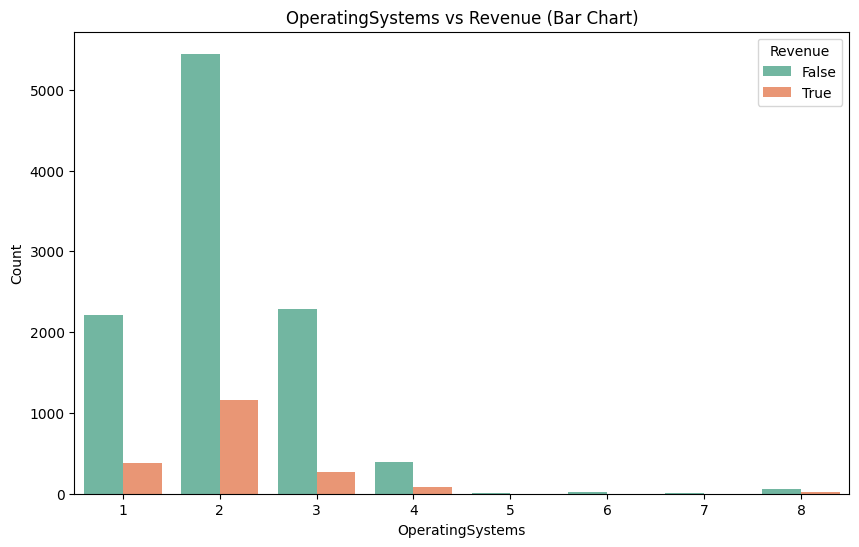

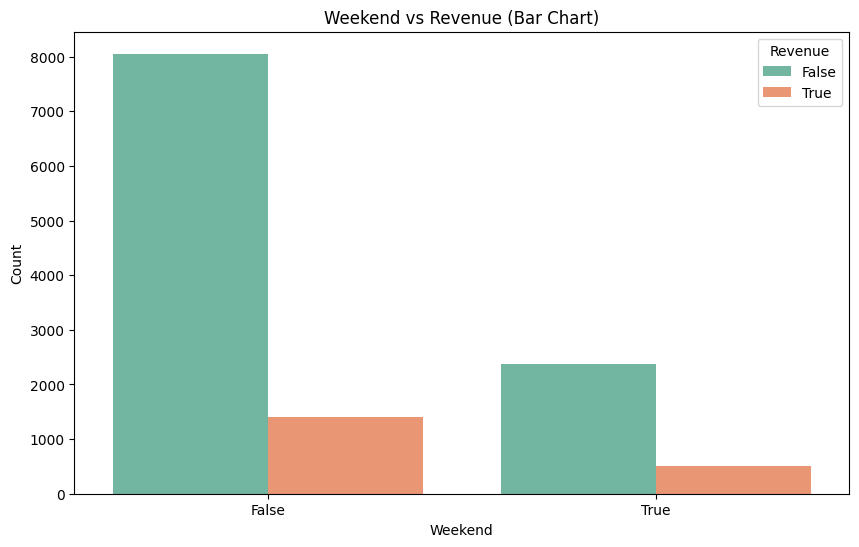

2025-09-05 12:34:28,292 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-05 12:34:28,322 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


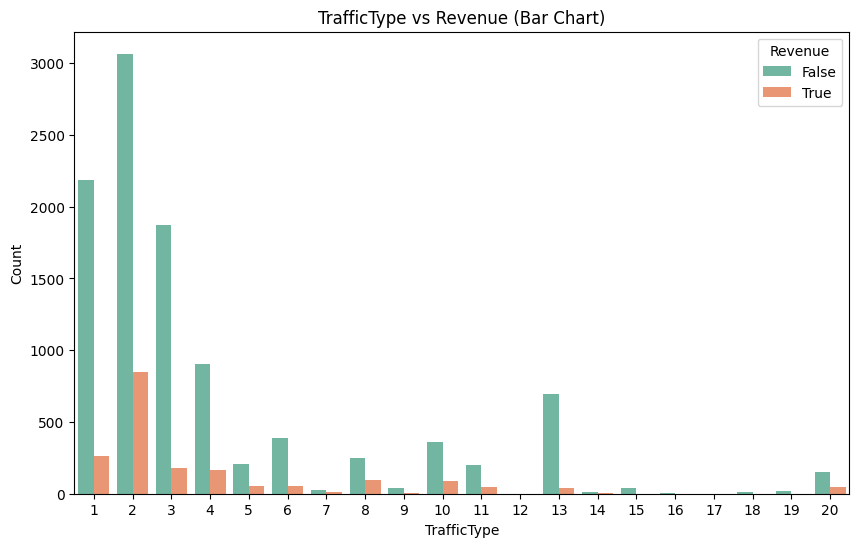

2025-09-05 12:34:28,800 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-05 12:34:28,821 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


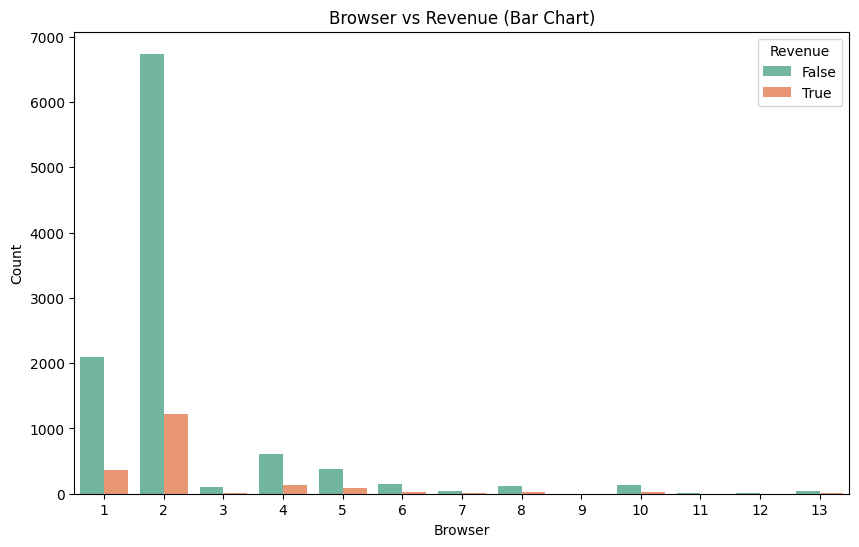

In [27]:
bivariate_analyzer.set_strategy(CategoricalVsCategoricalBarAnalysis())
bivariate_analyzer.execute_analysis(df, 'Month', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'SpecialDay', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'OperatingSystems', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'Weekend', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'TrafficType', 'Revenue')
bivariate_analyzer.execute_analysis(df, 'Browser', 'Revenue')

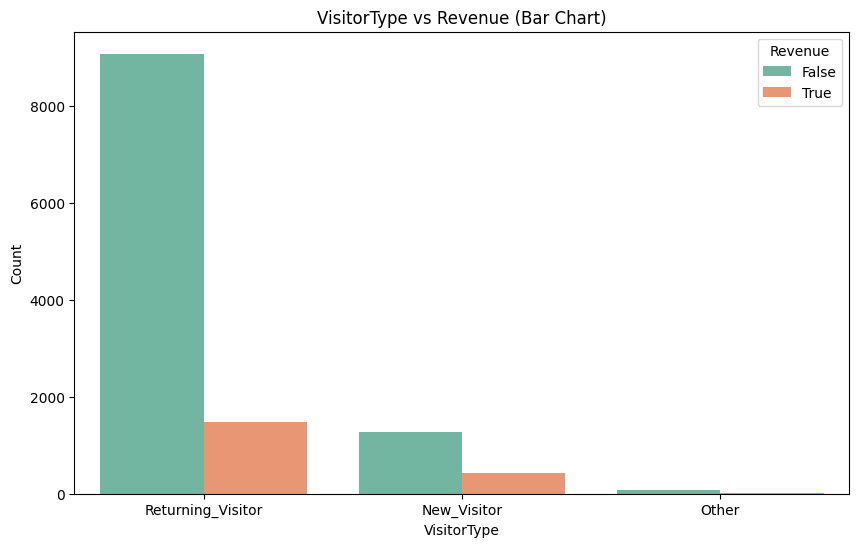

In [8]:
bivariate_analyzer.execute_analysis(df, 'VisitorType', 'Revenue')

#### First thoughts on Correlation

- SpecialDay doesn't seem to have a huge impact and most session happened on days that weren't close to special days. 
- Same goes for weekend.
- Month slightly peaks towards the end of the year in November - so it might have an impact on revenue.
- Operating System 2 is used most often, however it's hard to tell if it has an impact on revenue. I am thinking, 2 might have a slight impact since the proportion of revenue sessions is a bit higher but not much. 
- In terms of visitor type I am thinking, returning visitors tend to purchase slightly more often. 
- PageValues seems to have a huge positive impact on revenue. 
- ExitRates and BounceRates seem to have a negative impact on revenue. 
- Regarding pages, productrelated pages have much higher values so the most frequently visited pages are definitely product-related. With the amount of product sessions, it seems product duration and productrelated are slightly correlated - the more pages users visit, the more time they spend. 
- In general the quantity of page views aswell as page durations seem to have a positive impact on revenue. Pages visited and Page Duration possibly has a correlation going on there, which means, it might be sufficient to either use duration or page quantity. 
- Region doesn't seem to have an impact - i would probably exclude it. 
- Some traffic types might have a slight positive impact on revenue.
- Bounce Rates and Exit Rates are also correlated.

#### Multivariate Analysis

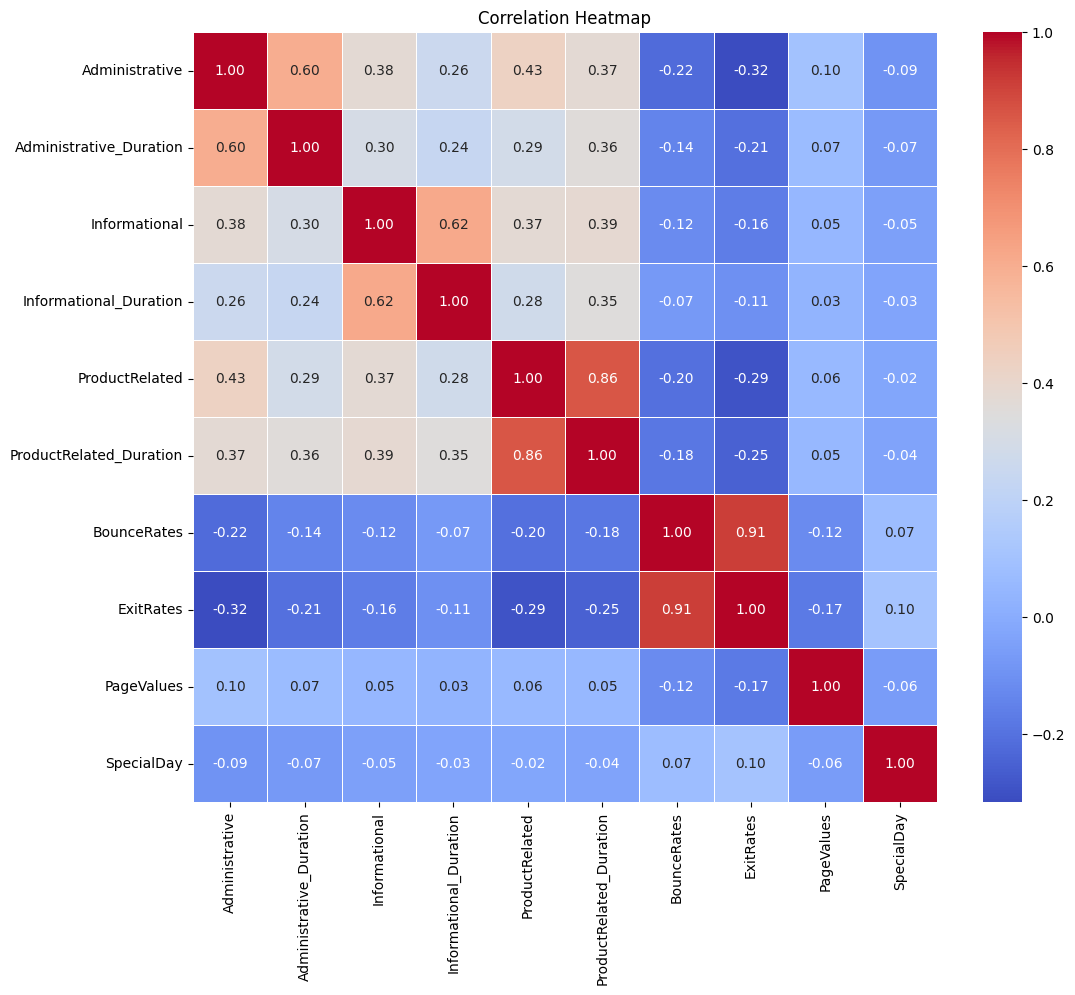

In [20]:
multivariate_analyzer = MultivariateAnalyser(CorrelationHeatmapAnalysis())
# Select numeric features for the analysis
selected_features = df[['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates','PageValues', 'SpecialDay']]
multivariate_analyzer.execute_analysis(selected_features)


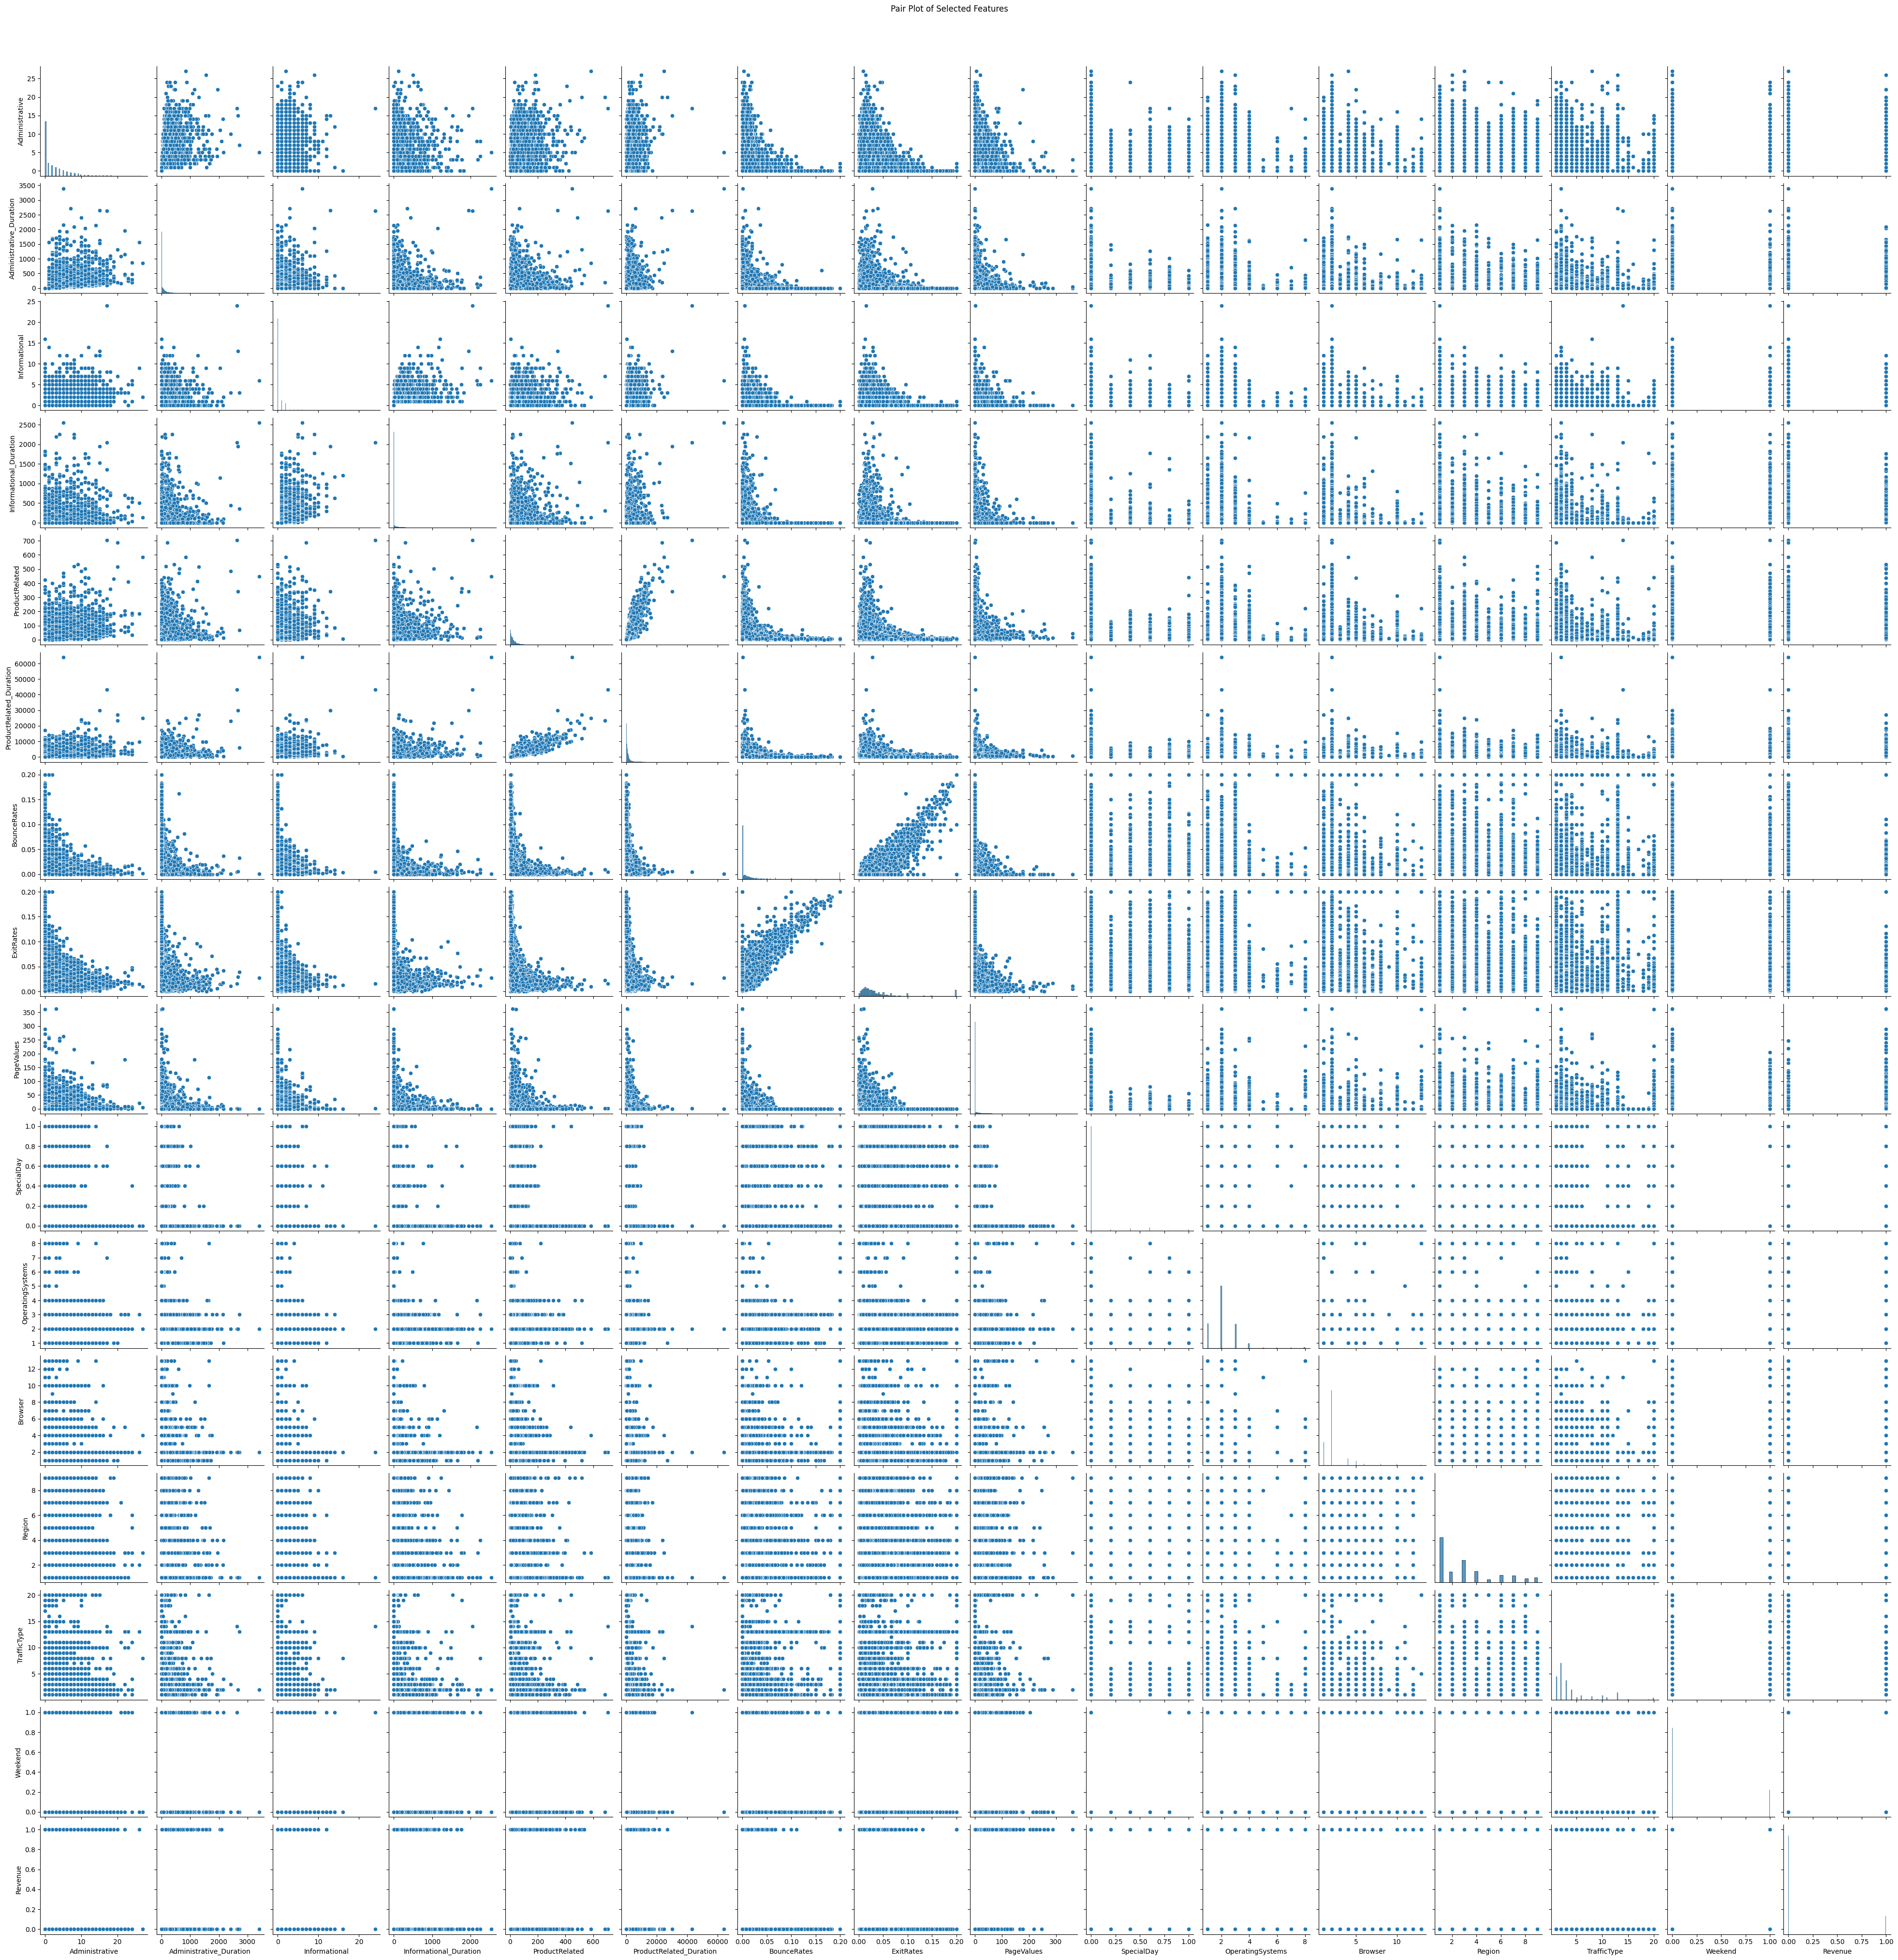

In [21]:
multivariate_analyzer.set_strategy(PairPlotAnalysis())
multivariate_analyzer.execute_analysis(df)